In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('quasar_train.csv')

In [3]:
df.head()

,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,0.629,1.910,0.976,2.161,0.964,2.068,1.630,1.716,2.378,-0.540,...,0.532,1.462,0.323,2.515,1.194,0.654,1.056,1.450,0.203,0.382
1,-0.161,1.830,0.609,1.932,0.932,0.857,0.978,1.032,1.793,1.455,...,0.961,1.407,1.296,0.943,1.055,2.265,1.053,1.439,0.767,-0.552
2,-0.085,-1.304,0.691,-0.800,-1.090,1.087,0.734,1.198,1.122,0.742,...,0.447,1.139,0.422,1.248,1.047,0.500,1.514,1.623,1.202,0.924
3,1.283,-0.487,0.660,0.167,-1.217,1.535,2.264,0.220,0.865,-0.723,...,0.714,1.173,1.579,0.477,0.781,0.525,2.466,1.493,1.503,0.698
4,-0.107,0.328,0.681,2.500,0.083,1.876,2.359,1.122,0.584,0.835,...,1.427,2.685,1.152,1.365,0.280,2.246,1.249,1.304,0.578,0.831


In [72]:
x = np.array([x for x in df.columns], dtype=int)
y = df.loc[0, :].values

In [73]:
x = np.array([np.ones(x.shape[0]), x]).T

In [78]:
theta = np.linalg.inv(x.T@x)@x.T@y

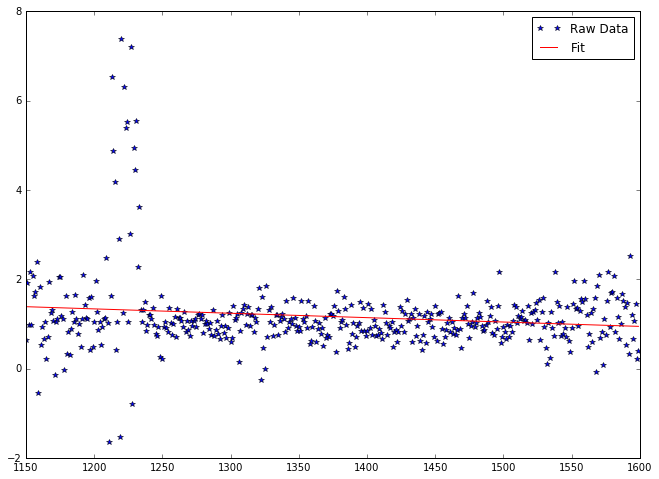

In [103]:
plt.figure(figsize=(11, 8))
raw_data, = plt.plot(x[:, 1], y, '*', label='Raw Data')
fit_line, = plt.plot(x[:, 1], theta[0] + theta[1] * x[:,1], '-r', label='Fit Line')
plt.legend([raw_data, fit_line], ['Raw Data', 'Fit'])

In [189]:
def get_weights_matrix(x, atu):
    x = x.reshape(-1, 1)
    y = x.T
    diff = x - y
    return np.exp(np.square(diff) / (2 * atu^2))

In [216]:
np.exp(- np.square( - np.array([1,2,3])))

array([  3.67879441e-01,   1.83156389e-02,   1.23409804e-04])

In [266]:
def locally_weighted_linear_regression(x, y, atu):
    num_samples = x.shape[0]
    x_with_ones = np.array([np.ones(x.shape[0]), x]).T
    y_smooth = np.zeros(num_samples)
    for i in range(num_samples):
        weights = np.diag(np.exp(- np.square(x[i] - x) / (2 * atu**2)))
        theta = np.linalg.inv(x_with_ones.T@weights@x_with_ones)@x_with_ones.T@weights@y
        y_smooth[i] = x_with_ones[i]@theta
    return y_smooth

In [267]:
x = np.array([x for x in df.columns], dtype=int)
y = df.loc[0, :].values

In [268]:
smooth_y = locally_weighted_linear_regression(x, y, 5)

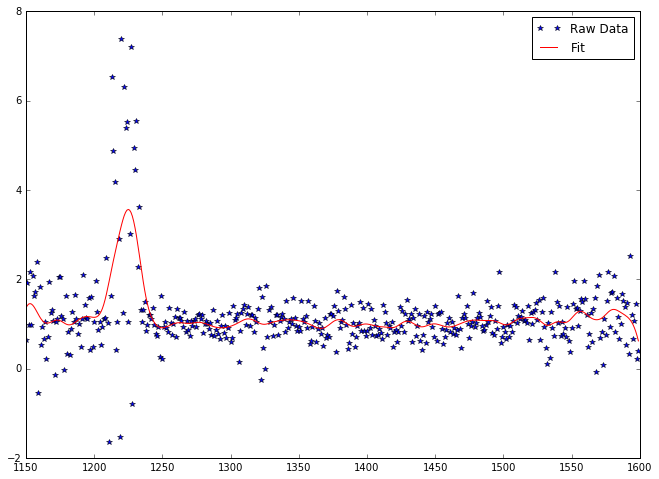

In [270]:
plt.figure(figsize=(11, 8))
raw_data, = plt.plot(x, y, '*', label='Raw Data')
fit_line, = plt.plot(x, smooth_y, '-r', label='Smooth Y')
plt.legend([raw_data, fit_line], ['Raw Data', 'Fit'])

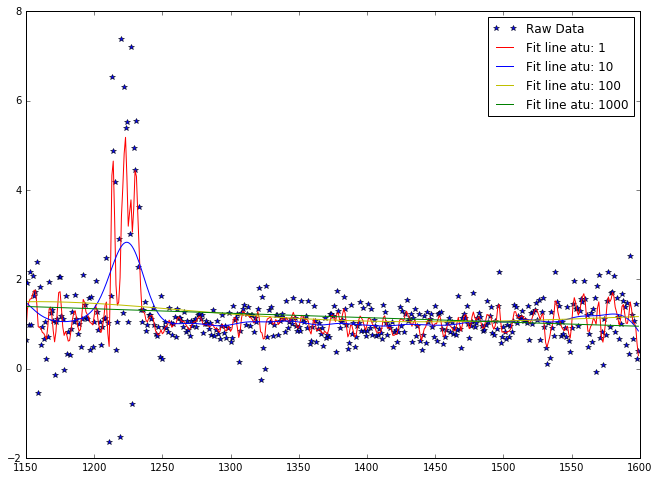

In [273]:
plt.figure(figsize=(11, 8))
raw_data, = plt.plot(x, y, '*', label='Raw Data')
figs = [raw_data]
for atu, col in zip([1, 10, 100, 1000], ['r', 'b', 'y', 'g']):
    smooth_y = locally_weighted_linear_regression(x, y, atu)
    fig, = plt.plot(x, smooth_y, '-'+col, label='Smooth Y {}'.format(atu))
    figs.append(fig)
plt.legend(figs, ['Raw Data'] + ['Fit line atu: {}'.format(atu) for atu in [1, 10, 100, 1000]])